## AND Logical Operator implemented using a simple perceptron

In [11]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [12]:
# defining the actibation function
# in this case, we will use sigmoid

# s(x) = 1/(1+e^(-x))

def sigmoid(z):
  
    return 1 / (1 + np.exp(-z))

In [13]:
# for a single layer perceptron, the output is computed as:
# y_pred = sigmoid(X1*w1 + X2*w2 + ...+ bias)

def forward_propagation(X, W, b):
    weighted_sum = np.dot(X, W) + b # calculate the weighted sum of X and W
    prediction = sigmoid(weighted_sum) # apply the sigmoid activation function
    return prediction


In [14]:
# for classification problems, the error used is binary cross entropy
# because it penalizes the wrong classifications more

def calculate_error(y, y_predicted):
   loss = np.sum(- y * np.log(y_predicted) - (1 - y) * np.log(1 - y_predicted)) 
   return loss

In [15]:
# defining a function which computes the gradient
# dW = (Y_pred - Y)*X
# db = (Y_pred - Y)

def gradient(X, Y, Y_predicted):

    Error = Y_predicted - Y 
    
    dW = np.dot(X.T, Error)
    db = np.sum(Error) 
    
    return dW, db 


In [16]:
# function to update the parameters
# W = W - learning_rate*dW
# b = b - learning_rate * db

def update_parameters(W, b, dW, db, learning_rate):

    W = W - learning_rate * dW 
    b = b - learning_rate * db 
    
    return W, b


In [17]:
# function to train the perceptron with batch update

def train(X, Y, learning_rate, W, b, epochs, losses):
  
    for i in range(epochs): 
        
        Y_predicted = forward_propagation(X, W, b)
        
        losses[i, 0] = calculate_error(Y, Y_predicted)
        
        dW, db = gradient(X, Y, Y_predicted)
        W, b = update_parameters(W, b, dW, db, learning_rate)
        

    return W, b, losses

In [18]:
# AND operator is defined as follows:
# 0 AND 0 = 0
# 0 AND 1 = 0
# 1 AND 0 = 0
# 1 AND 1 = 1

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # declaring four data points
Y = np.array([0, 0, 0, 1]) # actual label

weights = np.array([0.0, 0.0]) # weights of perceptron

bias = 0.0 # bias value

epochs = 10000 # total epochs

learning_rate = 0.01 # learning rate

losses = np.zeros((epochs, 1)) # compute loss

print("Before training")
print("weights:", weights, "bias:", bias)
print("Target labels:", Y)

Before training
weights: [0. 0.] bias: 0.0
Target labels: [0 0 0 1]


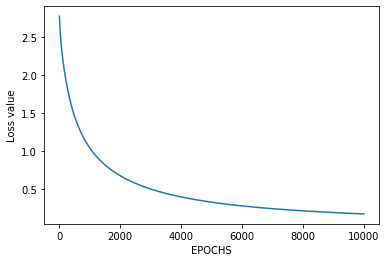


After training
weights: [5.56748034 5.56748034] bias: -8.530884655607794
Predicted labels: [0 0 0 1]


<Figure size 432x288 with 0 Axes>

In [19]:
weights, bias, losses = train(X, Y, learning_rate, weights, bias, epochs, losses)

# Evaluating the performance 
plt.figure() 
plt.plot(losses) 
plt.xlabel("EPOCHS") 
plt.ylabel("Loss value") 
plt.show() 
plt.savefig('legend.png')

print("\nAfter training")
print("weights:", weights, "bias:", bias)

# Predict value
A2 = forward_propagation(X, weights, bias)
pred = (A2 > 0.5) * 1
print("Predicted labels:", pred)